# Ford GoBike
## by Gabriela Garcia

## Investigation Overview

> My goal is to visualize the variance in use of the Ford GoBikes by user type, month, and station pairs.

## Dataset Overview

> Ford GoBike is a bike sharing service available in the San Francisco Bay area. Their service has been available in the San Francisco area since 2013, I will be exploring data about this bike sharing service from the year 2018. It is a public bike sharing system that is only available regionally. The data I will be presenting is from the year 2018, it is sectioned by month, and it contains information on each bike use instance. I will be looking at the user type (single use customer or long term subscriber), month, and station pairs for these instances.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
#loading in all 12 months of data from 2018
df01_original = pd.read_csv("201801-fordgobike-tripdata.csv");
df02_original = pd.read_csv("201802-fordgobike-tripdata.csv");
df03_original = pd.read_csv("201803-fordgobike-tripdata.csv");
df04_original = pd.read_csv("201804-fordgobike-tripdata.csv");
df05_original = pd.read_csv("201805-fordgobike-tripdata.csv");
df06_original = pd.read_csv("201806-fordgobike-tripdata.csv");
df07_original = pd.read_csv("201807-fordgobike-tripdata.csv");
df08_original = pd.read_csv("201808-fordgobike-tripdata.csv");
df09_original = pd.read_csv("201809-fordgobike-tripdata.csv");
df10_original = pd.read_csv("201810-fordgobike-tripdata.csv");
df11_original = pd.read_csv("201811-fordgobike-tripdata.csv");
df12_original = pd.read_csv("201812-fordgobike-tripdata.csv");
#making copies just incase
df01 = df01_original.copy()
df02 = df02_original.copy()
df03 = df03_original.copy()
df04 = df04_original.copy()
df05 = df05_original.copy()
df06 = df06_original.copy()
df07 = df07_original.copy()
df08 = df08_original.copy()
df09 = df09_original.copy()
df10 = df10_original.copy()
df11 = df11_original.copy()
df12 = df12_original.copy()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [6]:
#rides per month
df_rides_per_month = pd.DataFrame(columns=["month", "ride_count", "relative_count"])

count01 = df01.count()[0]
count02 = df02.count()[0]
count03 = df03.count()[0]
count04 = df04.count()[0]
count05 = df05.count()[0]
count06 = df06.count()[0]
count07 = df07.count()[0]
count08 = df08.count()[0]
count09 = df09.count()[0]
count10 = df10.count()[0]
count11 = df11.count()[0]
count12 = df12.count()[0]
total_count = count01 + count02 + count03 + count04 + count05 + count06 + count07 + count08 + count09 + count10 + count11 + count12

df_rides_per_month = df_rides_per_month.append({"month" : "Jan.", "ride_count" : count01, "relative_count" : count01/total_count}, ignore_index=True)
df_rides_per_month = df_rides_per_month.append({"month" : "Feb.", "ride_count" : count02, "relative_count" : count02/total_count}, ignore_index=True)
df_rides_per_month = df_rides_per_month.append({"month" : "Mar.", "ride_count" : count03, "relative_count" : count03/total_count}, ignore_index=True)
df_rides_per_month = df_rides_per_month.append({"month" : "Apr.", "ride_count" : count04, "relative_count" : count04/total_count}, ignore_index=True)
df_rides_per_month = df_rides_per_month.append({"month" : "May", "ride_count" : count05, "relative_count" : count05/total_count}, ignore_index=True)
df_rides_per_month = df_rides_per_month.append({"month" : "June", "ride_count" : count06, "relative_count" : count06/total_count}, ignore_index=True)
df_rides_per_month = df_rides_per_month.append({"month" : "July", "ride_count" : count07, "relative_count" : count07/total_count}, ignore_index=True)
df_rides_per_month = df_rides_per_month.append({"month" : "Aug.", "ride_count" : count08, "relative_count" : count08/total_count}, ignore_index=True)
df_rides_per_month = df_rides_per_month.append({"month" : "Sept.", "ride_count" : count09, "relative_count" : count09/total_count}, ignore_index=True)
df_rides_per_month = df_rides_per_month.append({"month" : "Oct.", "ride_count" : count10, "relative_count" : count10/total_count}, ignore_index=True)
df_rides_per_month = df_rides_per_month.append({"month" : "Nov.", "ride_count" : count11, "relative_count" : count11/total_count}, ignore_index=True)
df_rides_per_month = df_rides_per_month.append({"month" : "Dec.", "ride_count" : count12, "relative_count" : count12/total_count}, ignore_index=True)

## Total Rides per Month

> This is a bar chart of Ford GoBike total uses per month. In the barchart we can see a large increase in use over the summer months, as well as october being the most popular month for bike use.

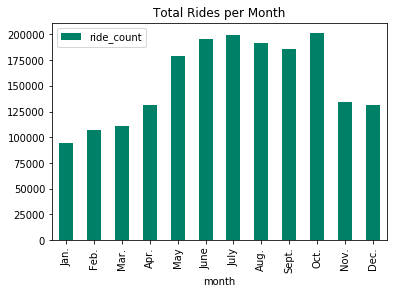

In [7]:
#plotting the monthly data
df_rides_per_month.ride_count = df_rides_per_month.ride_count.astype(int)
df_rides_per_month.plot.bar(x='month', y='ride_count', colormap='summer', title='Total Rides per Month');

In [11]:
#collecting data for starting stations
df_start_01 = df01.start_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_start_02 = df02.start_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_start_03 = df03.start_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_start_04 = df04.start_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_start_05 = df05.start_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_start_06 = df06.start_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_start_07 = df07.start_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_start_08 = df08.start_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_start_09 = df09.start_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_start_10 = df10.start_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_start_11 = df11.start_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_start_12 = df12.start_station_name.value_counts().rename_axis('station').reset_index(name='count')
#joining the tables
df_start_count = df_start_01.join(df_start_02.set_index('station'), on='station', lsuffix='01', rsuffix='02')
df_start_count = df_start_count.join(df_start_03.set_index('station'), on='station')
df_start_count = df_start_count.join(df_start_04.set_index('station'), on='station', lsuffix='03', rsuffix='04')
df_start_count = df_start_count.join(df_start_05.set_index('station'), on='station')
df_start_count = df_start_count.join(df_start_06.set_index('station'), on='station', lsuffix='05', rsuffix='06')
df_start_count = df_start_count.join(df_start_07.set_index('station'), on='station')
df_start_count = df_start_count.join(df_start_08.set_index('station'), on='station', lsuffix='07', rsuffix='08')
df_start_count = df_start_count.join(df_start_09.set_index('station'), on='station')
df_start_count = df_start_count.join(df_start_10.set_index('station'), on='station', lsuffix='09', rsuffix='10')
df_start_count = df_start_count.join(df_start_11.set_index('station'), on='station')
df_start_count = df_start_count.join(df_start_12.set_index('station'), on='station', lsuffix='11', rsuffix='12')
#adding a total count column for all starting station occurances per station over the year
df_start_count['total'] = df_start_count.count01 + df_start_count.count02 + df_start_count.count03 + df_start_count.count04 + df_start_count.count05 + df_start_count.count06 + df_start_count.count07 + df_start_count.count08 + df_start_count.count09 + df_start_count.count10 + df_start_count.count11 + df_start_count.count12
#collecting data for ending stations
df_end_01 = df01.end_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_end_02 = df02.end_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_end_03 = df03.end_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_end_04 = df04.end_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_end_05 = df05.end_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_end_06 = df06.end_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_end_07 = df07.end_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_end_08 = df08.end_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_end_09 = df09.end_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_end_10 = df10.end_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_end_11 = df11.end_station_name.value_counts().rename_axis('station').reset_index(name='count')
df_end_12 = df12.end_station_name.value_counts().rename_axis('station').reset_index(name='count')
#joing the tables
df_end_count = df_end_01.join(df_end_02.set_index('station'), on='station', lsuffix='01', rsuffix='02')
df_end_count = df_end_count.join(df_end_03.set_index('station'), on='station')
df_end_count = df_end_count.join(df_end_04.set_index('station'), on='station', lsuffix='03', rsuffix='04')
df_end_count = df_end_count.join(df_end_05.set_index('station'), on='station')
df_end_count = df_end_count.join(df_end_06.set_index('station'), on='station', lsuffix='05', rsuffix='06')
df_end_count = df_end_count.join(df_end_07.set_index('station'), on='station')
df_end_count = df_end_count.join(df_end_08.set_index('station'), on='station', lsuffix='07', rsuffix='08')
df_end_count = df_end_count.join(df_end_09.set_index('station'), on='station')
df_end_count = df_end_count.join(df_end_10.set_index('station'), on='station', lsuffix='09', rsuffix='10')
df_end_count = df_end_count.join(df_end_11.set_index('station'), on='station')
df_end_count = df_end_count.join(df_end_12.set_index('station'), on='station', lsuffix='11', rsuffix='12')
#adding a total count column for all ending station occurances per station over the year
df_end_count['total'] = df_end_count.count01 + df_end_count.count02 + df_end_count.count03 + df_end_count.count04 + df_end_count.count05 + df_end_count.count06 + df_end_count.count07 + df_end_count.count08 + df_end_count.count09 + df_end_count.count10 + df_end_count.count11 + df_end_count.count12
#joing start and end station data
df_all_count = df_start_count.join(df_end_count.set_index('station'), on='station', lsuffix='_start', rsuffix='_end')
#adding total count column
df_all_count['total'] = df_all_count.total_start + df_all_count.total_end


#using the count data to get the top ten most popular stations
df_most_popular = df_all_count.sort_values(by=['total'], ascending=False).iloc[0:10]
most_popular = df_most_popular.station.unique()


## Customer vs. Subscriber use for Popular Station Pairs from Month to Month

> This is a set of scatter plots to represent each month in 2018. The plots show uses for popular stations, where start station use is on the x axis and end station use is on the y axis. The opacity of the point shows the frequency or popularity of that start/stop station pair, while the stronger of the two colors shows if these instances we're mostly customer or subscirber uses. In these plots Orange is a subsriber use instance and Blue is a customer use instance.
>
>We can see how Customer use variaes and migrates from different station pairs during each month of the year. Some stations and some months seem to be more popular for customer use than others.

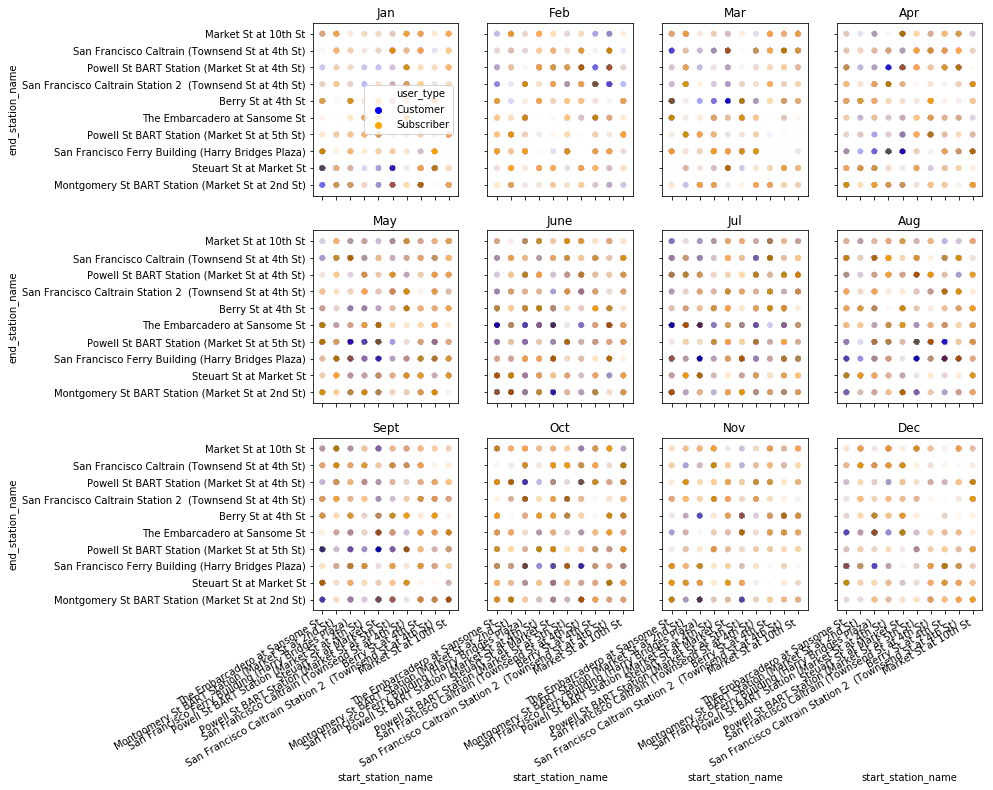

In [10]:
#plotting sub plots
f,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12)) = plt.subplots(3,4, sharex=True, sharey=True, figsize=(12,12))
ax1.set_title('Jan')
ax2.set_title('Feb')
ax3.set_title('Mar')
ax4.set_title('Apr')
ax5.set_title('May')
ax6.set_title('June')
ax7.set_title('Jul')
ax8.set_title('Aug')
ax9.set_title('Sept')
ax10.set_title('Oct')
ax11.set_title('Nov')
ax12.set_title('Dec')
sb.scatterplot(data = df01[df01.start_station_name.isin(most_popular)][df01.end_station_name.isin(most_popular)], x = df01.start_station_name, y = df01.end_station_name, alpha=1/100, hue = 'user_type', palette = {'Customer':'blue', 'Subscriber':'orange'}, legend='brief', ax=ax1).figure.autofmt_xdate();
sb.scatterplot(data = df02[df02.start_station_name.isin(most_popular)][df02.end_station_name.isin(most_popular)], x = df02.start_station_name, y = df02.end_station_name, alpha=1/100, hue = 'user_type', palette = {'Customer':'blue', 'Subscriber':'orange'}, legend=False, ax=ax2).figure.autofmt_xdate();
sb.scatterplot(data = df03[df03.start_station_name.isin(most_popular)][df03.end_station_name.isin(most_popular)], x = df03.start_station_name, y = df03.end_station_name, alpha=1/100, hue = 'user_type', palette = {'Customer':'blue', 'Subscriber':'orange'}, legend=False, ax=ax3).figure.autofmt_xdate();
sb.scatterplot(data = df04[df04.start_station_name.isin(most_popular)][df04.end_station_name.isin(most_popular)], x = df04.start_station_name, y = df04.end_station_name, alpha=1/100, hue = 'user_type', palette = {'Customer':'blue', 'Subscriber':'orange'}, legend=False, ax=ax4).figure.autofmt_xdate();
sb.scatterplot(data = df05[df05.start_station_name.isin(most_popular)][df05.end_station_name.isin(most_popular)], x = df05.start_station_name, y = df05.end_station_name, alpha=1/100, hue = 'user_type', palette = {'Customer':'blue', 'Subscriber':'orange'}, legend=False, ax=ax5).figure.autofmt_xdate();
sb.scatterplot(data = df06[df06.start_station_name.isin(most_popular)][df06.end_station_name.isin(most_popular)], x = df06.start_station_name, y = df06.end_station_name, alpha=1/100, hue = 'user_type', palette = {'Customer':'blue', 'Subscriber':'orange'}, legend=False, ax=ax6).figure.autofmt_xdate();
sb.scatterplot(data = df07[df07.start_station_name.isin(most_popular)][df07.end_station_name.isin(most_popular)], x = df07.start_station_name, y = df07.end_station_name, alpha=1/100, hue = 'user_type', palette = {'Customer':'blue', 'Subscriber':'orange'}, legend=False, ax=ax7).figure.autofmt_xdate();
sb.scatterplot(data = df08[df08.start_station_name.isin(most_popular)][df08.end_station_name.isin(most_popular)], x = df08.start_station_name, y = df08.end_station_name, alpha=1/100, hue = 'user_type', palette = {'Customer':'blue', 'Subscriber':'orange'}, legend=False, ax=ax8).figure.autofmt_xdate();
sb.scatterplot(data = df09[df09.start_station_name.isin(most_popular)][df09.end_station_name.isin(most_popular)], x = df09.start_station_name, y = df09.end_station_name, alpha=1/100, hue = 'user_type', palette = {'Customer':'blue', 'Subscriber':'orange'}, legend=False, ax=ax9).figure.autofmt_xdate();
sb.scatterplot(data = df10[df10.start_station_name.isin(most_popular)][df10.end_station_name.isin(most_popular)], x = df10.start_station_name, y = df10.end_station_name, alpha=1/100, hue = 'user_type', palette = {'Customer':'blue', 'Subscriber':'orange'}, legend=False, ax=ax10).figure.autofmt_xdate();
sb.scatterplot(data = df11[df11.start_station_name.isin(most_popular)][df11.end_station_name.isin(most_popular)], x = df11.start_station_name, y = df11.end_station_name, alpha=1/100, hue = 'user_type', palette = {'Customer':'blue', 'Subscriber':'orange'}, legend=False, ax=ax11).figure.autofmt_xdate();
sb.scatterplot(data = df12[df12.start_station_name.isin(most_popular)][df12.end_station_name.isin(most_popular)], x = df12.start_station_name, y = df12.end_station_name, alpha=1/100, hue = 'user_type', palette = {'Customer':'blue', 'Subscriber':'orange'}, legend=False, ax=ax12).figure.autofmt_xdate();
#blue = customer, orange = subscriber

In [12]:
df01_refined = df01[df01.start_station_name.isin(most_popular)]
df01_refined = df01_refined[df01_refined.end_station_name.isin(most_popular)]
df01_refined = df01_refined.groupby(['start_station_name', 'end_station_name']).size()/df01.count()[0]
df01_refined = df01_refined.reset_index(name = 'count')
df01_refined = df01_refined.pivot(index='start_station_name', columns='end_station_name', values='count')
df01_refined = df01_refined.fillna(0)

df02_refined = df02[df02.start_station_name.isin(most_popular)]
df02_refined = df02_refined[df02_refined.end_station_name.isin(most_popular)]
df02_refined = df02_refined.groupby(['start_station_name', 'end_station_name']).size()/df02.count()[0]
df02_refined = df02_refined.reset_index(name = 'count')
df02_refined = df02_refined.pivot(index='start_station_name', columns='end_station_name', values='count')
df02_refined = df02_refined.fillna(0)

df03_refined = df03[df03.start_station_name.isin(most_popular)]
df03_refined = df03_refined[df03_refined.end_station_name.isin(most_popular)]
df03_refined = df03_refined.groupby(['start_station_name', 'end_station_name']).size()/df03.count()[0]
df03_refined = df03_refined.reset_index(name = 'count')
df03_refined = df03_refined.pivot(index='start_station_name', columns='end_station_name', values='count')
df03_refined = df03_refined.fillna(0)

df04_refined = df04[df04.start_station_name.isin(most_popular)]
df04_refined = df04_refined[df04_refined.end_station_name.isin(most_popular)]
df04_refined = df04_refined.groupby(['start_station_name', 'end_station_name']).size()/df04.count()[0]
df04_refined = df04_refined.reset_index(name = 'count')
df04_refined = df04_refined.pivot(index='start_station_name', columns='end_station_name', values='count')
df04_refined = df04_refined.fillna(0)

df05_refined = df05[df05.start_station_name.isin(most_popular)]
df05_refined = df05_refined[df05_refined.end_station_name.isin(most_popular)]
df05_refined = df05_refined.groupby(['start_station_name', 'end_station_name']).size()/df05.count()[0]
df05_refined = df05_refined.reset_index(name = 'count')
df05_refined = df05_refined.pivot(index='start_station_name', columns='end_station_name', values='count')
df05_refined = df05_refined.fillna(0)

df06_refined = df06[df06.start_station_name.isin(most_popular)]
df06_refined = df06_refined[df06_refined.end_station_name.isin(most_popular)]
df06_refined = df06_refined.groupby(['start_station_name', 'end_station_name']).size()/df06.count()[0]
df06_refined = df06_refined.reset_index(name = 'count')
df06_refined = df06_refined.pivot(index='start_station_name', columns='end_station_name', values='count')
df06_refined = df06_refined.fillna(0)

df07_refined = df07[df07.start_station_name.isin(most_popular)]
df07_refined = df07_refined[df07_refined.end_station_name.isin(most_popular)]
df07_refined = df07_refined.groupby(['start_station_name', 'end_station_name']).size()/df07.count()[0]
df07_refined = df07_refined.reset_index(name = 'count')
df07_refined = df07_refined.pivot(index='start_station_name', columns='end_station_name', values='count')
df07_refined = df07_refined.fillna(0)

df08_refined = df08[df08.start_station_name.isin(most_popular)]
df08_refined = df08_refined[df08_refined.end_station_name.isin(most_popular)]
df08_refined = df08_refined.groupby(['start_station_name', 'end_station_name']).size()/df08.count()[0]
df08_refined = df08_refined.reset_index(name = 'count')
df08_refined = df08_refined.pivot(index='start_station_name', columns='end_station_name', values='count')
df08_refined = df08_refined.fillna(0)

df09_refined = df09[df09.start_station_name.isin(most_popular)]
df09_refined = df09_refined[df09_refined.end_station_name.isin(most_popular)]
df09_refined = df09_refined.groupby(['start_station_name', 'end_station_name']).size()/df09.count()[0]
df09_refined = df09_refined.reset_index(name = 'count')
df09_refined = df09_refined.pivot(index='start_station_name', columns='end_station_name', values='count')
df09_refined = df09_refined.fillna(0)

df10_refined = df10[df10.start_station_name.isin(most_popular)]
df10_refined = df10_refined[df10_refined.end_station_name.isin(most_popular)]
df10_refined = df10_refined.groupby(['start_station_name', 'end_station_name']).size()/df10.count()[0]
df10_refined = df10_refined.reset_index(name = 'count')
df10_refined = df10_refined.pivot(index='start_station_name', columns='end_station_name', values='count')
df10_refined = df10_refined.fillna(0)

df11_refined = df11[df11.start_station_name.isin(most_popular)]
df11_refined = df11_refined[df11_refined.end_station_name.isin(most_popular)]
df11_refined = df11_refined.groupby(['start_station_name', 'end_station_name']).size()/df11.count()[0]
df11_refined = df11_refined.reset_index(name = 'count')
df11_refined = df11_refined.pivot(index='start_station_name', columns='end_station_name', values='count')
df11_refined = df11_refined.fillna(0)

df12_refined = df12[df12.start_station_name.isin(most_popular)]
df12_refined = df12_refined[df12_refined.end_station_name.isin(most_popular)]
df12_refined = df12_refined.groupby(['start_station_name', 'end_station_name']).size()/df12.count()[0]
df12_refined = df12_refined.reset_index(name = 'count')
df12_refined = df12_refined.pivot(index='start_station_name', columns='end_station_name', values='count')
df12_refined = df12_refined.fillna(0)

## Heat Maps of Station Pairs from Month to Month
>This visualization is a heatmap of similiar data that was found in the scatter plots but we are able to see better indicators of the popularity of station pairs using the colr mapping. The dark colors represent low frequency while the colorful colors move from pink to orange to show higher frequency, and the cells that are white represent the max or most used station pairs.
>
>We can see that a lot of the most popular station pairs stay the same from month to month, but one notable difference is that there are more pink and orange cells in the Sept - Dec row. The values here are relative so this is not related to the popularity of the month its self but rather the variance and increase of certain routes during these months.



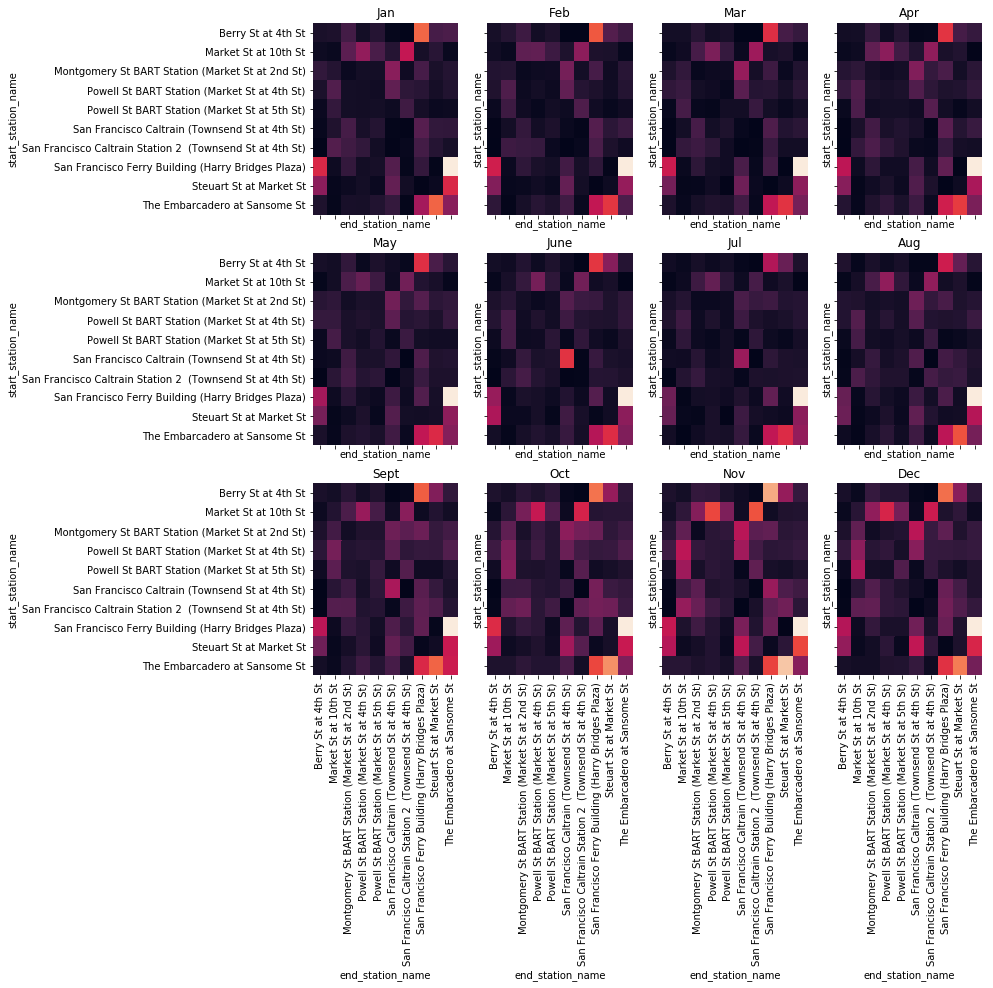

In [15]:
f,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12)) = plt.subplots(3,4, sharex=True, sharey=True, figsize=(12,12))
ax1.set_title('Jan')
ax2.set_title('Feb')
ax3.set_title('Mar')
ax4.set_title('Apr')
ax5.set_title('May')
ax6.set_title('June')
ax7.set_title('Jul')
ax8.set_title('Aug')
ax9.set_title('Sept')
ax10.set_title('Oct')
ax11.set_title('Nov')
ax12.set_title('Dec')
sb.heatmap(df01_refined,cbar=False, ax=ax1);
sb.heatmap(df02_refined,cbar=False, ax=ax2);
sb.heatmap(df03_refined,cbar=False, ax=ax3);
sb.heatmap(df04_refined,cbar=False, ax=ax4);
sb.heatmap(df05_refined,cbar=False, ax=ax5);
sb.heatmap(df06_refined,cbar=False, ax=ax6);
sb.heatmap(df07_refined,cbar=False, ax=ax7);
sb.heatmap(df08_refined,cbar=False, ax=ax8);
sb.heatmap(df09_refined,cbar=False, ax=ax9);
sb.heatmap(df10_refined,cbar=False, ax=ax10);
sb.heatmap(df11_refined,cbar=False, ax=ax11);
sb.heatmap(df12_refined,cbar=False, ax=ax12);

## Conclusion
>Overall my visualizations can be used to track customer trends and migrations during certain months of the year. The variation of customer use and increased diversity in station pairs during certain months could be signs of weather trends, increased tourist use, or seasonal attractions and events.


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!